# 作业2

### 第1题：Numpy 练习

以下运算都可以调用相应的函数而避免使用显式循环。

(a) 生成1000个服从 (0, 1) 间均匀分布的随机数，赋值给变量 `u`，打印其前10个元素。再生成1000个 (0, 1) 间均匀分布的随机数，赋值给变量 `v`，打印其最后10个元素。

In [1]:
import numpy as np
num = 1000

np.random.seed(2024)
u = np.random.uniform(0,1,num)
print(u[:10])
v = np.random.uniform(0,1,num)
print(v[-10:])


[0.58801452 0.69910875 0.18815196 0.04380856 0.20501895 0.10606287
 0.72724014 0.67940052 0.4738457  0.44829582]
[0.38882145 0.05906198 0.21703983 0.55157187 0.71457371 0.54537386
 0.28595563 0.33117239 0.50775814 0.98033782]


(b) 创建向量 `x` 和 `y`，令其在数学上等于 $x=\sqrt{-2\log (u)}\cos(2\pi v)$，$y=\sqrt{-2\log (u)}\sin(2\pi v)$，其中 $\log$ 为自然对数。请使用 Numpy 提供的数学函数来避免显式循环。查找在 Python 中绘制图形的方法，绘制 `x` 和 `y` 的直方图。

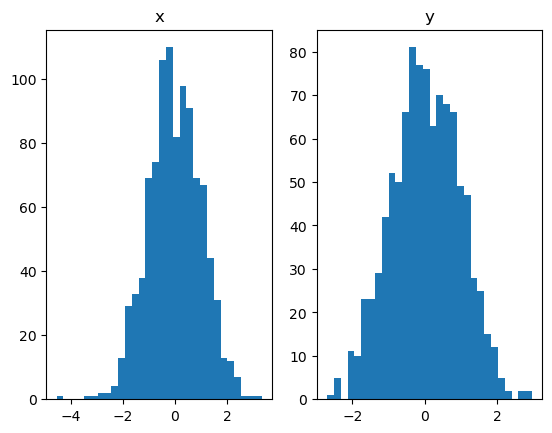

In [2]:
x = np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
y = np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v)

import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.hist(x, bins=30)
plt.title('x')

plt.subplot(1,2,2)
plt.hist(y, bins=30)
plt.title('y')
plt.show()

(c) 计算 `x` 和 `y` 向量的线性相关系数。请使用 Numpy 提供的数学函数来避免显式循环。

In [3]:
correlation_xy = np.corrcoef(x,y)[0, 1]
print(correlation_xy)

-0.013358761427087829


(d) 猜测或证明 $(X,Y)$ 服从什么分布，并简要说明理由。

$(X,Y)$服从二元标准正态分布。证明如下：

- 假定$X$和$Y$为两个独立的标准正态随机变量，它们的联合密度函数为：
  $$f(x,y) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}\frac{1}{\sqrt{2\pi}}e^{-y^2/2} = \frac{1}{2\pi}e^{-(x^2+y^2)/2}$$
- 利用极坐标变换法，对上式进行变量替换：$r^2=x^2+y^2, \theta=arctan\frac{y}{x}$，此变换有雅可比行列式为2，故原密度函数可写为：
  $$f(x,y) = \frac{1}{2\times2\pi}e^{-r/2}, 0<r<+\infty, 0<\theta<2\pi$$
- 可拆解为一个均值为2的指数随机变量和$(0,2\pi)$上均匀随机变量的密度函数($\frac{1}{2}e^{-r/2}$和$\frac{1}{2\pi}$)乘积，因此可以利用随机数$u,v$以及逆变换法生成$r^2$和$\theta$这两个随机变量，分别是$-2logu$和$2\pi$，进而反解出$x=\sqrt{-2\log (u)}\cos(2\pi v)$，$y=\sqrt{-2\log (u)}\sin(2\pi v)$。因此$(X,Y)$服从二元标准正态分布。

(e) 将 `y` 转为 $200\times 5$ 的矩阵，赋值给 `mat1`，元素**按行排列**。打印其前5行。

In [4]:
mat1 = np.reshape(y, (200,5))
print(mat1[:5])

[[ 1.02066225  0.77080523  0.77363667  0.53944644 -0.63992939]
 [-0.87822619 -0.0319728  -0.74580088  0.57677044 -1.16271308]
 [-0.67181501 -0.71279182 -1.00450445  0.20623701 -0.27793848]
 [ 0.53187881 -0.46499886  0.70335197  0.87019652 -0.76723013]
 [ 1.04426315 -0.15530945  0.26956186  0.82776483 -0.21639672]]


(f) 将 `y` 转为 $200\times 5$ 的矩阵，赋值给 `mat2`，元素**按列排列**。打印其前5行。（提示：可以使用转置操作）

In [5]:
mat2 = np.reshape(y, (5,200)).T
print(mat2[:5])

[[ 1.02066225e+00 -2.22517043e-01 -8.33462267e-01 -4.57737515e-01
  -1.58404622e+00]
 [ 7.70805231e-01  2.43315399e-01 -1.18020023e+00  9.43210478e-02
   3.53644449e-01]
 [ 7.73636667e-01 -8.47993885e-02 -8.02134833e-01  1.51598162e+00
   1.33439946e+00]
 [ 5.39446439e-01  2.85976137e+00  3.06347759e-01  4.73728594e-01
  -8.46090806e-01]
 [-6.39929388e-01  4.62956884e-01 -2.06529870e-03  2.05440683e+00
   1.59264070e+00]]


(g) 计算 `mat1` 每一列的均值，得到一个长度为5的向量 `v`，将其打印出来。然后将 `mat1` 的每一列进行中心化（即减去各自的均值），赋给变量 `mat1_centered`。类似地，计算 `mat1_centered` 的列均值向量并打印出来。

In [6]:
v = np.mean(mat1, axis=0)
print(v)
mat1_centered = mat1 - v
print(np.mean(mat1_centered, axis=0))

[-0.00028795  0.01236572  0.04289148  0.01229356  0.07862658]
[ 8.32667268e-19  3.10862447e-17 -1.11022302e-17  2.56739074e-18
  3.33066907e-18]


### 第2题：简单并行 Ray 程序

(a) 参考 `lec3-ray-basics.ipynb` 中的例子，使用蒙特卡洛方法估计 $\pi$，但进行如下的修改。依然分 $m=1000$ 组对 $S$ 进行独立的估计，但每一组产生点的数量不同，其中第 $i$ 组产生 $n_i=1000\cdot i$ 个点得到 $\hat{S}_i$。问这种设定下最终的估计值 $\hat{S}$ 应该如何计算？请给出其表达式，并解释为什么选择这一形式。（提示：在 `lec3-ray-basics.ipynb` 中，每组产生的点的数量 $n_i$ 相同，最终的估计值为 $\hat{S}=m^{-1}\sum_{i=1}^m \hat{S}_i$。当 $n_i$ 各不相同时，是否依然使用这一表达式？）

此设定下，估计值应为:
$$\hat{S} = \sum_{i=1}^{m}\frac{mi}{\sum_{i=1}^{m}mi}\hat{S_i}$$
因为对估计量的加权应和该次估计所使用的样本点成正相关。在前例中可以给每个组相同的权重是因为每组样本点数量相同，而样本点数量不同时则应按照这一数量作为权重来求得最终的估计值。

(b) 使用普通 Python 程序根据 (a) 中的表达式计算 $\hat{S}$，打印出计算结果并测量计算时间。

In [7]:
m = 1000
def single_estimate(i):
    np.random.seed(i)
    npoints = m*i
    x = np.random.uniform(-1.0, 1.0, npoints)
    y = np.random.uniform(-1.0, 1.0, npoints)
    in_area = (x**2 + y**2 <= 1.0)
    return 4.0 * in_area.sum() / npoints

#test
print('test:',single_estimate(m))

points_num = sum([m*i for i in range(1,m+1)])

import time
start_time = time.time()
final_estimation = sum([m*i/points_num * single_estimate(i) for i in range(1,m+1)]) 
end_time = time.time()

print('estimation:',final_estimation)
print('time consumed:',end_time-start_time)

test: 3.143996
estimation: 3.141585830169831
time consumed: 10.897518634796143


(c) 使用 Ray 编写程序解决该问题，至少开启4个计算核心，打印出计算结果并测量计算时间。

In [10]:
import ray
ray.init(num_cpus=8)

@ray.remote
def parallel_estimate(i):
    npoints = m*i
    coefficient = npoints/points_num
    np.random.seed(i)
    x = np.random.uniform(-1.0, 1.0, npoints)
    y = np.random.uniform(-1.0, 1.0, npoints)
    in_area = (x**2 + y**2 <= 1.0)
    return coefficient * 4.0 * in_area.sum() / npoints

start_time = time.time()
tasks = [parallel_estimate.remote(i) for i in range(1, m+1)]
final_estimation_ray = sum(ray.get(tasks))
end_time = time.time()

ray.shutdown()
print('estimation:',final_estimation_ray)
print('time consumed:',end_time-start_time)

2024-04-05 18:14:48,548	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


estimation: 3.141585830169831
time consumed: 5.75908088684082
